# Python | Classify Handwritten Digits with Tensorflow

this is a basic problem in machine learning, I will use a linear Classifier Algorithm with tf.contrib.learn

### Importing all dependence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow  as tf
import logging

learn = tf.estimator

logging.getLogger("tensorflow").setLevel(logging.ERROR)

## I mporting Dataset using MNIST Data

In [2]:
import tensorflow_datasets as tfds
# Load the MNIST dataset
mnist_dataset, mnist_info = tfds.load('mnist', with_info=True, as_supervised=True)

# The dataset is split into train and test datasets
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

# Convert the samples from tensors to numpy arrays
train_images = []
train_labels = []
for example in tfds.as_dataframe(mnist_train, mnist_info).itertuples():
    image = np.array(example.image).flatten()  # Flatten the image here
    label = example.label
    train_images.append(image)
    train_labels.append(label)

test_images = []
test_labels = []
for example in tfds.as_dataframe(mnist_test, mnist_info).itertuples():
    image = np.array(example.image).flatten()  # Flatten the image
    label = example.label
    test_images.append(image)
    test_labels.append(label)

# Convert lists to numpy arrays
data = np.array(train_images)
labels = np.array(train_labels, dtype=np.int32)
test_data = np.array(test_images)
test_labels = np.array(test_labels, dtype=np.int32)


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


### Making the dataset

In [3]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

# Display the dataset

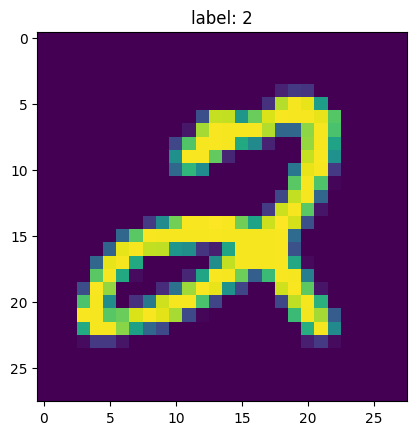

In [4]:
def display(i):
    img = test_data[i]
    plt.title('label: {}'.format(test_labels[i]))
    plt.imshow(img.reshape((28,28)))
    plt.show()

# the image is a tensor of 28 x 28 px
display(0)

### Fitting the data and using the Linear Classifier

In [5]:
# data is a 2D numpy array
num_pixels = data.shape[1]
num_pixels

784

In [7]:
feature_columns = [tf.feature_column.numeric_column("x", shape=[num_pixels])]

# Define the classifier
classifier = tf.estimator.LinearClassifier(
    n_classes=10,
    feature_columns=feature_columns
)

# Define the input function
input_fn = tf.compat.v2.compat.v1.estimator.inputs.numpy_input_fn(
    x={"x": data},
    y=labels,
    batch_size=100,
    num_epochs=None,
    shuffle=True
)

# Train the model
classifier.train(input_fn=input_fn, steps=1000)


### Eevaluataing accuracy

In [10]:
# Define the input function for evaluation
eval_input_fn = tf.compat.v2.compat.v1.estimator.inputs.numpy_input_fn(
    x={"x": test_data},
    y=test_labels,
    num_epochs=1,
    shuffle=False
)

# Evaluate the model
eval_results = classifier.evaluate(input_fn=eval_input_fn)
print(eval_results['accuracy'])


0.8774


### Predicting Data

Predicted class: 2, Actual label: 2


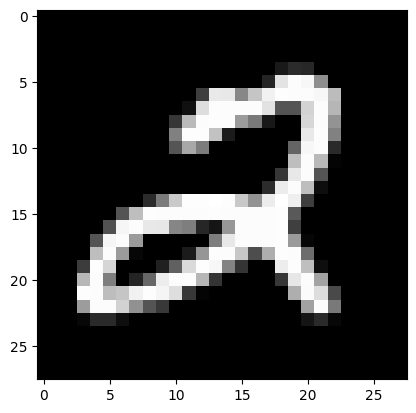

In [12]:
# Define the input function for prediction
predict_input_fn = tf.compat.v2.compat.v1.estimator.inputs.numpy_input_fn(
    x={"x": np.array([test_data[0]], dtype=float)},
    num_epochs=1,
    shuffle=False
)

# Get the predictions
predictions = classifier.predict(input_fn=predict_input_fn)

# The predictions are returned as a generator, so we use next() to get the first one
prediction = next(predictions)

# Print the predicted and actual labels
print("Predicted class: {}, Actual label: {}".format(prediction['class_ids'][0], test_labels[0]))

# Display the image
plt.imshow(test_data[0].reshape(28, 28), cmap='gray')
plt.show()
